#  Graph with eigenvector centrality represented by node size

In [3]:
import numpy as np

In [14]:
import networkx as nx

In [15]:
import math

In [5]:
import matplotlib.pyplot as plt

In [6]:
A = np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])

In [7]:
H = nx.from_numpy_matrix(A)

In [116]:
d = nx.eigenvector_centrality(H)

In [119]:
d

{0: 0.1957540414970864,
 1: 0.1116880543296416,
 2: 0.19575404149708636,
 3: 0.378751077373384,
 4: 0.4680839101306905,
 5: 0.4680839101306905,
 6: 0.4099765880693859,
 7: 0.3840179229632457,
 8: 0.11695489991950335}

In [120]:
labels = d.keys()

In [121]:
for (k,v) in d.items():
    d[k]= float(round(v,2))

In [122]:
nx.draw_circular(H, node_color = [v for v in d.values()], with_labels= True, node_list = d.values(), node_size=[v * 10000 for v in d.values()], labels=d)

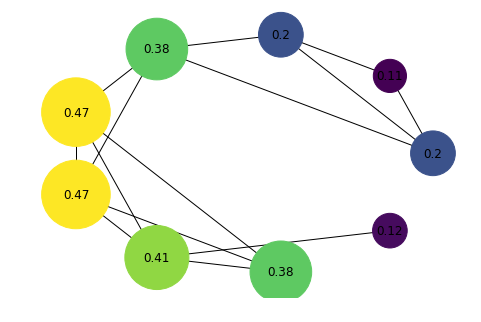

In [123]:
plt.show()

# Degree Centrality for Graph H

In [124]:
n = len(H.nodes)

In [125]:
Degree_Centrality = []

In [126]:
for i in H:
    Degree_Centrality.append(len(H.edges(i))/(n-1))

In [127]:
Degree_Centrality

[0.375, 0.25, 0.375, 0.5, 0.5, 0.5, 0.5, 0.375, 0.125]

### Checking the correctness of output using networkx function

In [74]:
nx.degree_centrality(H)

{0: 0.375,
 1: 0.25,
 2: 0.375,
 3: 0.5,
 4: 0.5,
 5: 0.5,
 6: 0.5,
 7: 0.375,
 8: 0.125}

# Closeness Centrality for Graph H

In [66]:
path_length = dict(nx.shortest_path_length(H))


In [68]:
total = []
for a,subList in path_length.items():
    input = []
    for key,val in subList.items():
        input.append(val)
    total.append(sum(i for i in input))

In [69]:
total

[17, 23, 17, 13, 13, 13, 16, 17, 23]

In [101]:
Closeness_Centrality = []

In [145]:
for v in total:
    Closeness_Centrality.append((n-1)/v)

In [103]:
Closeness_Centrality

[0.47058823529411764,
 0.34782608695652173,
 0.47058823529411764,
 0.6153846153846154,
 0.6153846153846154,
 0.6153846153846154,
 0.5,
 0.47058823529411764,
 0.34782608695652173]

### Checking the correctness of the output using networkx function

In [138]:
nx.closeness_centrality(H)

{0: 0.47058823529411764,
 1: 0.34782608695652173,
 2: 0.47058823529411764,
 3: 0.6153846153846154,
 4: 0.6153846153846154,
 5: 0.6153846153846154,
 6: 0.5,
 7: 0.47058823529411764,
 8: 0.34782608695652173}

# Betweenness Centrality for Graph H

In [130]:
def betweenness(H):
    V = len(H)
    keys=[]
    values = []
    temp = []
    result1 = 0
    result2 = 0
    final_result = 0
    
    for i in range(0,V):
        keys.append(i)
    
    for i in range(0,V):
        for j in range(0,V):
            if(j != i):
                for k in range (j+1,V):
                    if(k != i):
                        for p in nx.all_shortest_paths(H,j,k):
                            if(i in p and p[0]!=i and p[-1]!=i):
                                result1 = result1 + 1
                            result2 = result2 + 1
                        sumation = result1/result2
                        result1 = 0
                        result2 = 0
                        final_result = final_result + sumation
        values.append(final_result)
        final_result = 0
            
    betweenness = dict(zip(keys,values))
    return betweenness

In [146]:
betweenness(H)

{0: 3.0, 1: 0.0, 2: 3.0, 3: 15.0, 4: 6.0, 5: 6.0, 6: 7.0, 7: 0.0, 8: 0.0}

### Checking the correctness of the output using networkx function

In [134]:
nx.betweenness_centrality(H, normalized = False)

{0: 3.0, 1: 0.0, 2: 3.0, 3: 15.0, 4: 6.0, 5: 6.0, 6: 7.0, 7: 0.0, 8: 0.0}

# EigenVector Centrality for Graph H 

In [22]:
def eigenVector_centrality(H):
    start = {eigenValue: 1 for eigenValue in H}
    x = {k: eigenValue / sum(start.values()) for k, eigenValue in start.items()}
    
    for i in range(100):
        xLast = x
        x = xLast.copy()
        for n in x:
            for j in H[n]:
                x[j] += xLast[n] * H[n][j].get(None, 1)
        eigenVector_centrality_network = {}
        norm = math.sqrt(sum(z ** 2 for z in x.values())) or 1
        x = {k: v / norm for k, v in x.items()}
        eigenVector_centrality_network = x     
    return eigenVector_centrality_network

eigenVector_centrality_values = eigenVector_centrality(H)

In [143]:
eigenVector_centrality(H)

{0: 0.1957487957093128,
 1: 0.11168370323997331,
 2: 0.1957487957093128,
 3: 0.3787480253357536,
 4: 0.468085476310384,
 5: 0.468085476310384,
 6: 0.4099793895328847,
 7: 0.3840203838410446,
 8: 0.11695606174526428}

### Checking the correctness of the output using networkx function

In [144]:
nx.eigenvector_centrality(H)

{0: 0.1957540414970864,
 1: 0.1116880543296416,
 2: 0.19575404149708636,
 3: 0.378751077373384,
 4: 0.4680839101306905,
 5: 0.4680839101306905,
 6: 0.4099765880693859,
 7: 0.3840179229632457,
 8: 0.11695489991950335}